In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 

In [6]:
pd.set_option('display.max_columns', None)

In [11]:
df=pd.read_csv('dataset_31_credit-g.csv')
df.head(10)



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,4,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,2,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,4,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,2,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [65]:
df.dtypes
df.shape

(1000, 21)


##### 1.1 Determine which features are continuous and which are categorical.

Categorical features are: checking_status			purpose		savings_status	employment		personal_status	other_parties		property_magnitude		other_payment_plans	housing		job		own_telephone	foreign_worker	class installment_commitment residence_since existing_credits num_dependents

Continuous features are: duration   age credit_amount 

##### 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target.

Text(0.5, 1.0, 'age')

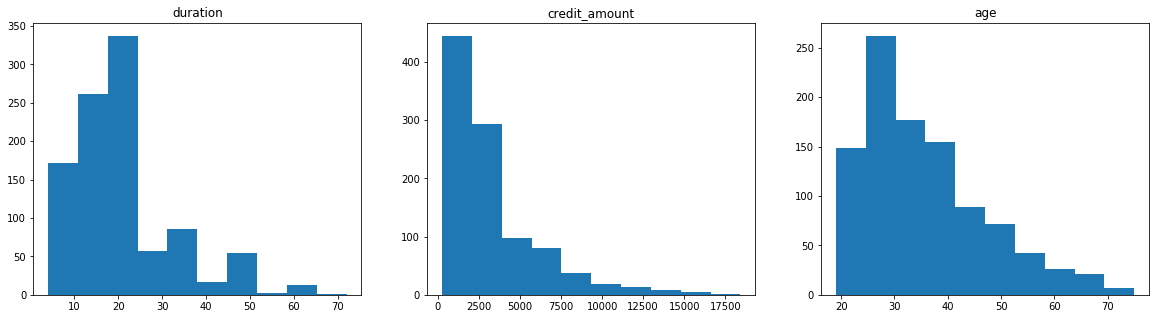

In [52]:
fig, axes=plt.subplots(1,3,figsize=(20,5))
axes[0].hist(df['duration'])
axes[0].set_title('duration')
axes[1].hist(df['credit_amount'])
axes[1].set_title('credit_amount')
axes[2].hist(df['age'])
axes[2].set_title('age')

(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

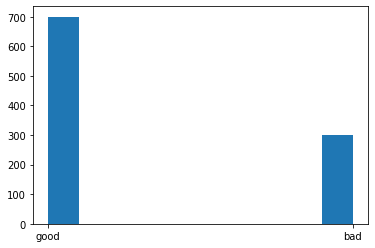

In [39]:
plt.hist(df['class'])

##### 1.3 Split data into training and test set. Do not use the test set until a final evaluation in 1.5. 
##### Preprocess the data (such as treatment of categorical variables) without using a pipeline and
##### evaluate an initial LogisticRegression model with an training/validation split.

In [214]:
X=df.iloc[:,0:20]
X.shape
Y=df.iloc[:,-1]


In [157]:
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y,test_size=0.2, random_state = 0)
Xtrain, Xval, Ytrain, Yval = train_test_split(X_trainval, Y_trainval,test_size=0.2, random_state = 0)


In [76]:
df.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 

continuous=['duration', 'age', 'credit_amount']
Xtrain_cts=Xtrain.loc[:,continuous]
Xval_cts=Xval.loc[:,continuous]
scaler=StandardScaler()
scaler.fit(Xtrain_cts)
Xtrain_cts_scaled=scaler.transform(Xtrain_cts)
Xval_cts_scaled=scaler.transform(Xval_cts)
Xtrain.loc[:,continuous]=Xtrain_cts_scaled

Xtrain=pd.get_dummies(Xtrain)
Xval=pd.get_dummies(Xval)

In [120]:
Xtrain

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,savings_status_'100<=X<500',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes
187,-0.374443,-0.704676,2,3,2.690541,3,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
867,-0.700711,0.038987,2,4,0.493211,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
818,1.256896,4.359546,2,3,0.577724,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
709,-0.945412,-0.379410,2,2,0.070647,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
85,-0.700711,-0.622928,4,2,-0.605454,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.278092,2.797370,2,3,-0.605454,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
243,-0.700711,-0.701227,3,2,-0.774480,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
444,2.235700,0.647784,2,3,-0.520942,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
866,-0.211309,-0.285934,4,1,-0.774480,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0


In [144]:
import warnings
warnings.filterwarnings('ignore')
logireg=LogisticRegression().fit(Xtrain,Ytrain)
logireg.score(Xval,Yval)


0.33125

##### 1.4
Use ColumnTransformer and pipeline to encode categorical variables (your choice of
OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate
Logistic Regression, linear support vector machines and nearest neighbors using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [135]:
categorical = (X.dtypes == "object" )|( X.columns=='installment_commitment')|( X.columns=='residence_since') |(X.columns=='existing_credits') |(X.columns=='num_dependents')
categorical

checking_status            True
duration                  False
credit_history             True
purpose                    True
credit_amount             False
savings_status             True
employment                 True
installment_commitment     True
personal_status            True
other_parties              True
residence_since            True
property_magnitude         True
age                       False
other_payment_plans        True
housing                    True
existing_credits           True
job                        True
num_dependents             True
own_telephone              True
dtype: bool

In [145]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X,Y, random_state = 0)
Xtrain, Xval, Ytrain, Yval = train_test_split(X_trainval, Y_trainval, random_state = 0)


preprocess1 = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
preprocess2 = make_column_transformer(
    (OneHotEncoder(), categorical))

In [146]:
# Logistic Regression
model1= make_pipeline(preprocess1, LogisticRegression())
model2 = make_pipeline(preprocess2, LogisticRegression())
model1_score = np.mean(cross_val_score(model1, X_trainval, Y_trainval, cv=10))
model2_score = np.mean(cross_val_score(model2, X_trainval, Y_trainval, cv=10))
print("Score with scaling:", model1_score)
print("Score without scaling:", model2_score)

Score with scaling: 0.7493153153153153
Score without scaling: 0.7439990516832622


In [147]:
# linear support vector machines
svm1 = make_pipeline(preprocess1, LinearSVC(max_iter=10000))
svm2 = make_pipeline(preprocess2, LinearSVC(max_iter=10000))

svm1_score = np.mean(cross_val_score(svm1, X_trainval, Y_trainval, cv=10))
svm2_score = np.mean(cross_val_score(svm2, X_trainval, Y_trainval, cv=10))
print("Score with scaling:", svm1_score)
print("Score without scaling:", svm2_score)

Score with scaling: 0.7478928402086298
Score without scaling: 0.7399985775248933


In [148]:
# K nearest neighbors
knn1 = make_pipeline(preprocess1, KNeighborsClassifier())
knn2 = make_pipeline(preprocess2, KNeighborsClassifier())

knn1_score = np.mean(cross_val_score(knn1, X_trainval, Y_trainval, cv=10))
knn2_score = np.mean(cross_val_score(knn2, X_trainval, Y_trainval, cv=10))
print("Score with scaling:", knn1_score)
print("Score without scaling:", knn2_score)

Score with scaling: 0.7304845898530109
Score without scaling: 0.7133807491702229


The result are not very different for SVM and Logistic regression, scaling slightliy improves the result of KNN as KNN is highly senstive to distance. 

##### 1.5 Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the 
##### model on the test set.
##### Visualize the performance as function of the parameters for all three models.

In [150]:
from sklearn.model_selection import GridSearchCV np.logspace(-4, 4, 9)

In [188]:
# Logistic Regression
lreg_pipe = make_pipeline(preprocess1, LogisticRegression())
lreg_param_grid = {'logisticregression__C': np.logspace(-4, 4, 20) }
log_grid = GridSearchCV(lreg_pipe, lreg_param_grid, cv = 10, return_train_score = True)
log_grid.fit(X_trainval, Y_trainval)
print(log_grid.best_params_)
print(log_grid.score(X_test,Y_test))



{'logisticregression__C': 0.615848211066026}
0.708


In [187]:
# linear support vector machines
svm_pipe = make_pipeline(preprocess1, LinearSVC(max_iter = 1000))
svm_param_grid = {'linearsvc__C': np.logspace(-4, 4, 20)}
svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv = 10, return_train_score = True)
svm_grid.fit(X_trainval, Y_trainval)
print('best parameter:', svm_grid.best_params_)
print('Score on test set:',svm_grid.score(X_test,Y_test))


best parameter: {'linearsvc__C': 0.03359818286283781}
Score on test set: 0.712


In [190]:
# KNN
knn_pipe = make_pipeline(preprocess_1, KNeighborsClassifier())
knn_param_grid= {'kneighborsclassifier__n_neighbors':  np.arange(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv = 10, return_train_score = True)
knn_grid.fit(X_trainval, Y_trainval)
print('best parameter:', knn_grid.best_params_)
print('Score on test set:',knn_grid.score(X_test,Y_test))

best parameter: {'kneighborsclassifier__n_neighbors': 5}
Score on test set: 0.76


The model which has the best score on test set is KNN model. The test set score is 0.76

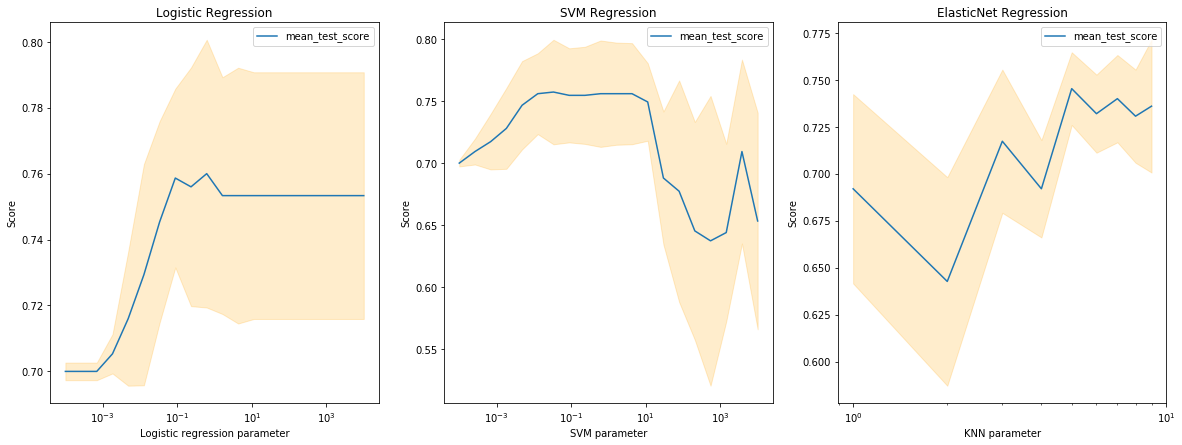

In [198]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 7));


axes[0].semilogx(log_grid.cv_results_['param_logisticregression__C'].data, 
             log_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[0].fill_between(np.logspace(-4, 4, 20),
                       log_grid.cv_results_['mean_test_score'] - log_grid.cv_results_['std_test_score'],
                       log_grid.cv_results_['mean_test_score'] + log_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');

axes[0].legend();
axes[0].set_xlabel('Logistic regression parameter');
axes[0].set_ylabel('Score');
axes[0].set_title('Logistic Regression');

# LASSO plot

axes[1].semilogx(svm_grid.cv_results_['param_linearsvc__C'].data, 
             svm_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[1].fill_between(np.logspace(-4, 4, 20),
                       svm_grid.cv_results_['mean_test_score'] - svm_grid.cv_results_['std_test_score'],
                       svm_grid.cv_results_['mean_test_score'] + svm_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');
axes[1].legend();
axes[1].set_xlabel('SVM parameter');
axes[1].set_ylabel('Score');
axes[1].set_title('SVM Regression');

# ElasticNet

axes[2].semilogx(knn_grid.cv_results_['param_kneighborsclassifier__n_neighbors'].data, 
             knn_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[2].fill_between(np.arange(1,10),
                       knn_grid.cv_results_['mean_test_score'] - knn_grid.cv_results_['std_test_score'],
                       knn_grid.cv_results_['mean_test_score'] + knn_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');
axes[2].legend();
axes[2].set_xlabel('KNN parameter');
axes[2].set_ylabel('Score');
axes[2].set_title('ElasticNet Regression');


##### 1.6 
Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [170]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [180]:
# Logistic Regression
kf1 = KFold(n_splits=10, shuffle=True, random_state = 1 )
grid = GridSearchCV(lreg_pipe, lreg_param_grid, cv = kf1, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print(" ‘kfold’ with shuffling best parameter : ", grid.best_params_)

kf2 = KFold(n_splits=10, shuffle=True, random_state = 2)
grid = GridSearchCV(lreg_pipe, lreg_param_grid, cv=kf2, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print("‘kfold’ with shuffling different random state best parameter : ", grid.best_params_)

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state = 666)
grid = GridSearchCV(lreg_pipe, lreg_param_grid, cv=kf1, return_train_score=True)
grid.fit(X_trainval, Y_trainval)
print(" Change the random state of the split, best parameters : ", grid.best_params_)

 ‘kfold’ with shuffling best parameter :  {'logisticregression__C': 0.615848211066026}
‘kfold’ with shuffling different random state best parameter :  {'logisticregression__C': 0.08858667904100823}
 Change the random state of the split, best parameters :  {'logisticregression__C': 0.615848211066026}


In [181]:
# # linear support vector machines
kf1 = KFold(n_splits=10, shuffle=True, random_state = 1 )
grid = GridSearchCV(svm_pipe, svm_param_grid, cv = kf1, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print(" ‘kfold’ with shuffling best parameter : ", grid.best_params_)

kf2 = KFold(n_splits=10, shuffle=True, random_state = 2)
grid = GridSearchCV(svm_pipe, svm_param_grid, cv=kf2, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print("‘kfold’ with shuffling different random state best parameter : ", grid.best_params_)

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state = 666)
grid = GridSearchCV(svm_pipe, svm_param_grid, cv=kf1, return_train_score=True)
grid.fit(X_trainval, Y_trainval)
print("Change the random state of the split, best parameters: ", grid.best_params_)

 ‘kfold’ with shuffling best parameter :  {'linearsvc__C': 0.03359818286283781}
‘kfold’ with shuffling different random state best parameter :  {'linearsvc__C': 0.012742749857031334}
Change the random state of the split, best parameters:  {'linearsvc__C': 0.03359818286283781}


In [182]:
# KNN
kf1 = KFold(n_splits=10, shuffle=True, random_state = 1 )
grid = GridSearchCV(knn_pipe, knn_param_grid, cv = kf1, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print(" ‘kfold’ with shuffling best parameter : ", grid.best_params_)

kf2 = KFold(n_splits=10, shuffle=True, random_state = 2)
grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kf2, return_train_score = True)
grid.fit(X_trainval, Y_trainval)
print("‘kfold’ with shuffling different random state best parameter : ", grid.best_params_)

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state = 666)
grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kf1, return_train_score=True)
grid.fit(X_trainval, Y_trainval)
print("Change the random state of the split, best parameters: ", grid.best_params_)

 ‘kfold’ with shuffling best parameter :  {'kneighborsclassifier__n_neighbors': 7}
‘kfold’ with shuffling different random state best parameter :  {'kneighborsclassifier__n_neighbors': 7}
Change the random state of the split, best parameters:  {'kneighborsclassifier__n_neighbors': 7}


Changing to kfold,shuffule random state and random state for splitting also changes the best parameter.

##### 1.7 
Visualize the 20 most important coefficients for LogisticRegression and Linear Support
Vector Machines using hyper-parameters that performed well in the grid-search.

In [221]:
# Logistic
X_dummy = pd.get_dummies(X, columns=['checking_status','purpose','savings_status',
                                 'employment','personal_status','other_parties','property_magnitude',
                                 'other_payment_plans','housing','job','own_telephone',
                                 'foreign_worker','installment_commitment','residence_since',
                                 'existing_credits','num_dependents'])

log_top = np.abs(log_grid.best_estimator_[1].coef_[0])
log_top_20 = log_top.argsort()[-20:][::-1]
log_top_20 = np.sort(log_top_20)
list(X_dummy.columns[log_top_20])

['credit_history',
 'age',
 "checking_status_'0<=X<200'",
 "checking_status_'<0'",
 "checking_status_'>=200'",
 "purpose_'domestic appliance'",
 'purpose_business',
 'purpose_furniture/equipment',
 'purpose_other',
 'purpose_repairs',
 "employment_'4<=X<7'",
 "employment_'<1'",
 "personal_status_'female div/dep/mar'",
 "other_parties_'co applicant'",
 "property_magnitude_'life insurance'",
 'other_payment_plans_bank',
 'other_payment_plans_none',
 'other_payment_plans_stores',
 'job_skilled',
 'own_telephone_none']

Text(0.5, 1.0, 'Top 20 coefficients for logistic regression')

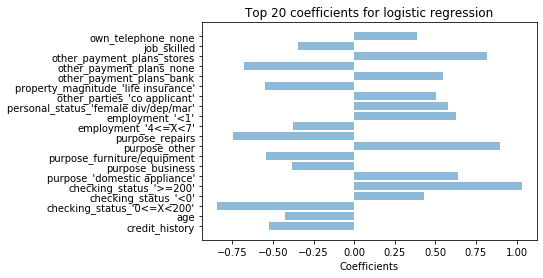

In [224]:
# Logistic
ypos=range(0,20)
plt.barh(range(0,20),log_grid.best_estimator_[1].coef_[0][log_top_20],align='center', alpha=0.5)
plt.yticks(ypos,list(X_dummy.columns[log_top_20]))
           
plt.xlabel("Coefficients")
plt.title("Top 20 coefficients for logistic regression")

In [225]:
#SVM

svm_top = np.abs(svm_grid.best_estimator_[1].coef_[0])
svm_top_20 = svm_top.argsort()[-20:][::-1]
svm_top_20 = np.sort(svm_top_20)
list(X_dummy.columns[svm_top_20])

['credit_history',
 'age',
 "checking_status_'0<=X<200'",
 "checking_status_'<0'",
 "checking_status_'>=200'",
 "purpose_'domestic appliance'",
 'purpose_business',
 'purpose_furniture/equipment',
 'purpose_other',
 'purpose_repairs',
 "employment_'<1'",
 "employment_'>=7'",
 "personal_status_'female div/dep/mar'",
 "other_parties_'co applicant'",
 "property_magnitude_'life insurance'",
 'other_payment_plans_bank',
 'other_payment_plans_none',
 'other_payment_plans_stores',
 'job_skilled',
 'own_telephone_none']

Text(0.5, 1.0, 'Top 20 coefficients for linear SVM')

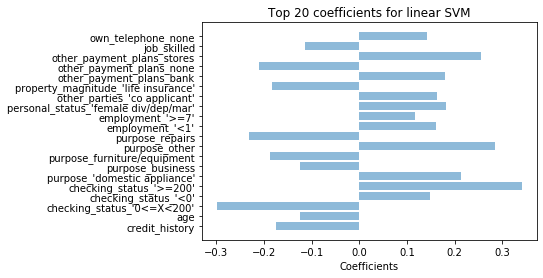

In [226]:
# SVM
ypos=range(0,20)
plt.barh(range(0,20),svm_grid.best_estimator_[1].coef_[0][svm_top_20],align='center', alpha=0.5)
plt.yticks(ypos,list(X_dummy.columns[svm_top_20]))
           
plt.xlabel("Coefficients")
plt.title("Top 20 coefficients for linear SVM")